In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from collections import Counter

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Downloads\Dune Sales Data - Dune Sales Data.csv")

In [3]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [4]:
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(34867, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [7]:
df.isna().sum()

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

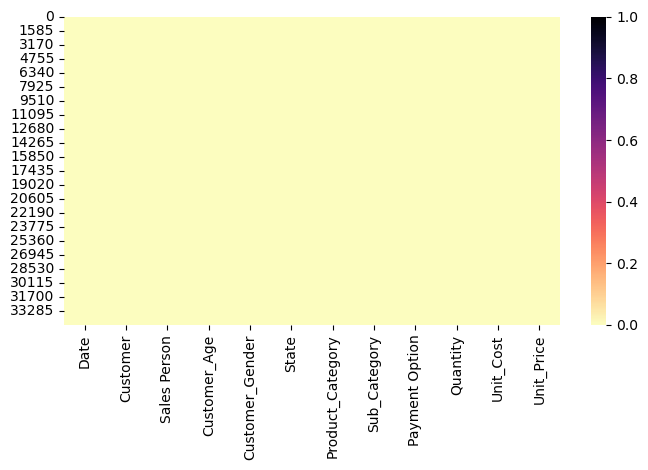

In [8]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isna(), cbar=True, cmap="magma_r")
plt.show()

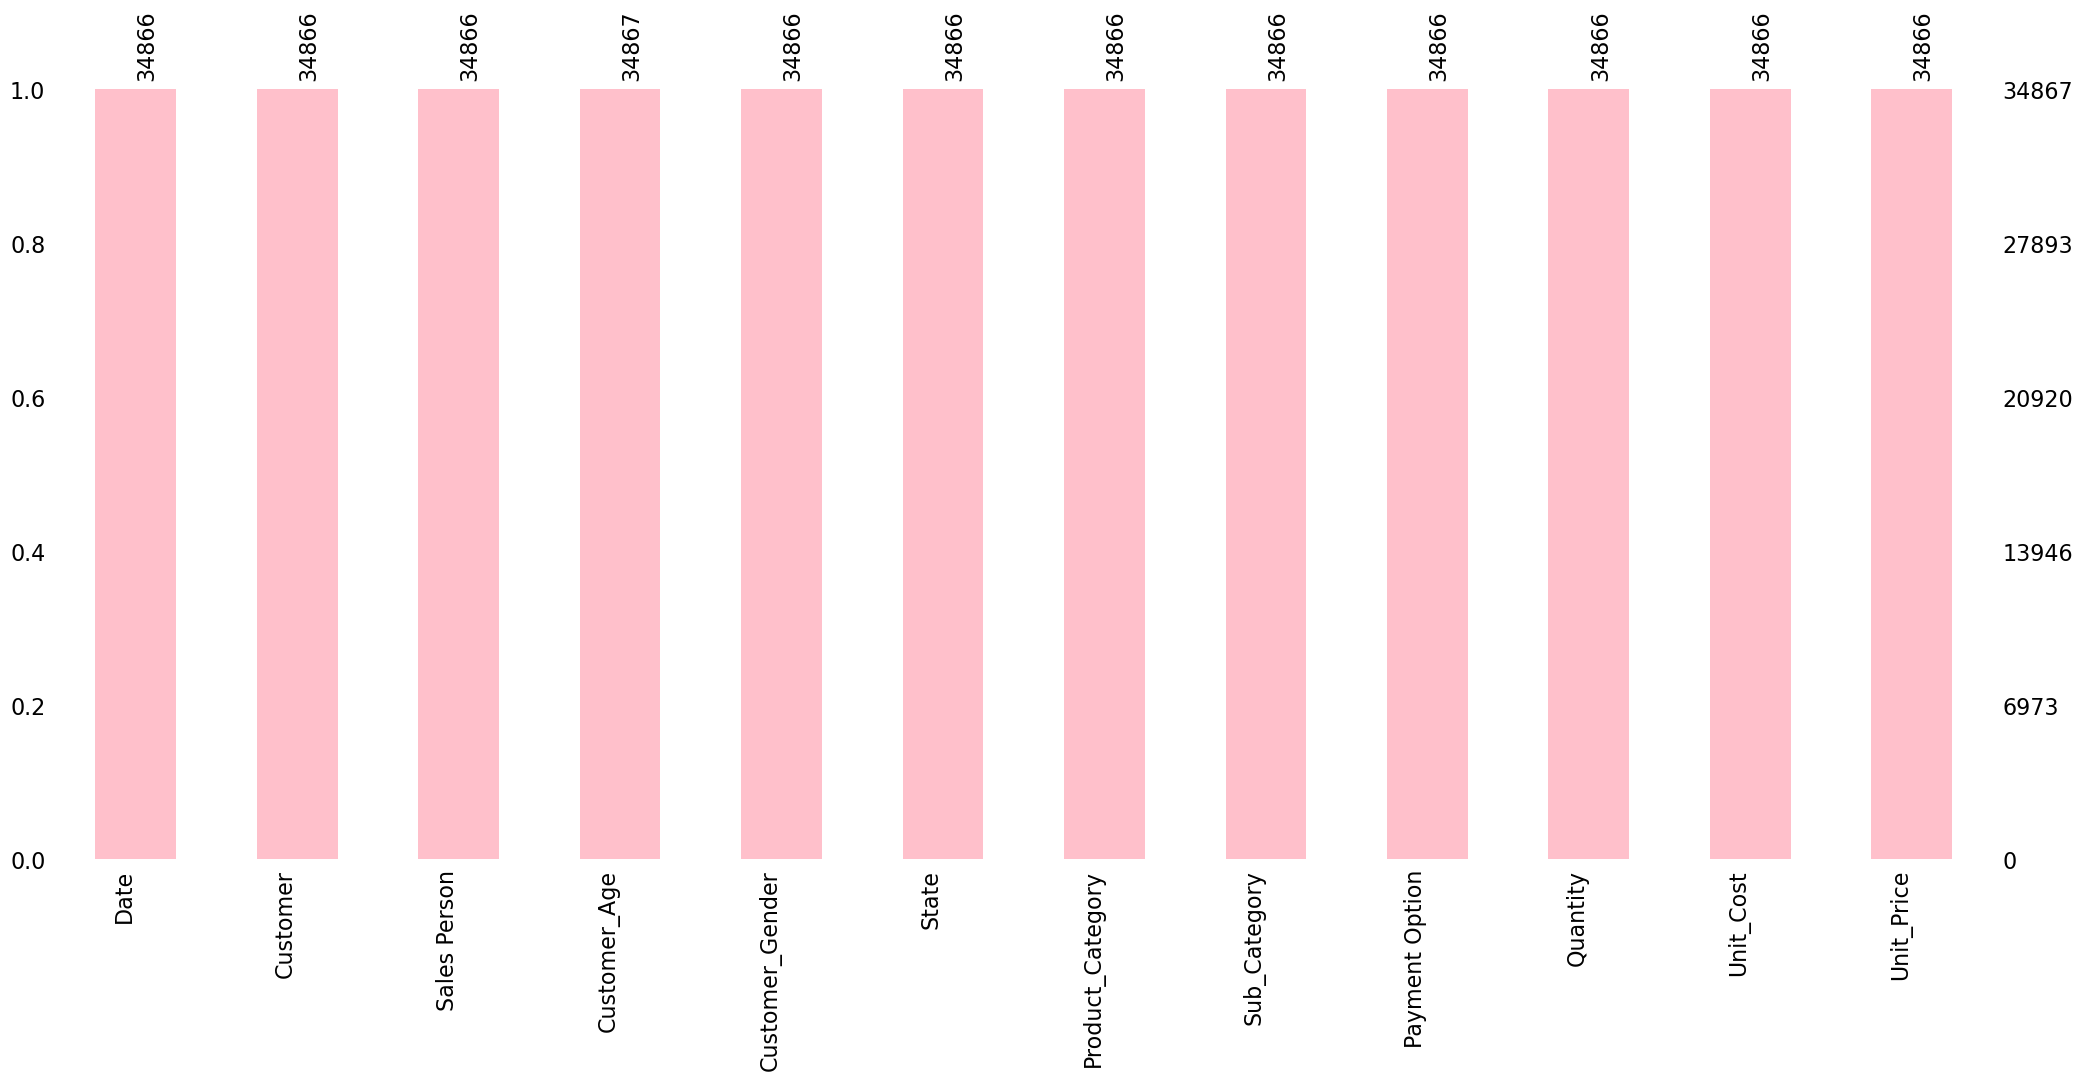

In [9]:
msn.bar(df, color="pink", label_rotation=90);

In [10]:
df[df.isna().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34865.000000,34865.000000,34865.000000,34865.000000
mean,36.382447,2.002524,349.890315,389.243235
std,11.113071,0.813948,490.019492,525.322787
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [17]:
df.describe(include=["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34865,34865,34865,34865,34865,34865,34865,34865
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17438,10332,22533,11112,15911


In [18]:
df["Date"] = pd.to_datetime(df["Date"])
print (df.info());

<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34865 non-null  datetime64[ns]
 1   Customer          34865 non-null  object        
 2   Sales Person      34865 non-null  object        
 3   Customer_Age      34865 non-null  int64         
 4   Customer_Gender   34865 non-null  object        
 5   State             34865 non-null  object        
 6   Product_Category  34865 non-null  object        
 7   Sub_Category      34865 non-null  object        
 8   Payment Option    34865 non-null  object        
 9   Quantity          34865 non-null  float64       
 10  Unit_Cost         34865 non-null  float64       
 11  Unit_Price        34865 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB
None


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6812\3250642261.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [19]:
# Datetime Analysis
df['year'] = df['Date'].dt.year
df['month']= df["Date"].dt.month
df['month_name']= df["Date"].dt.month_name()
df['quarter']= df["Date"].dt.quarter
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1


In [20]:
# Define the age_group function
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40:
        return "26-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elders"

# Apply the age_group function to the 'Customer_Age' column
df["Age_Group"] = df["Customer_Age"].apply(age_group)
df.head(2)    

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,Age_Group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,26-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,26-40 Adult


# COST, REVENUE AND PROFIT CALCULATION

In [22]:
df["cost"] = df["Quantity"] * df["Unit_Cost"]
df["revenue"] = df["Quantity"] * df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,Age_Group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,26-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,26-40 Adult,49.0,57.0,8.0


# REVENUE AND PROFIT

In [24]:
def PL(x):
    if x >= 0:
        return "profit"
    else:
        return "loss"
df["P or L"] = df["profit"].apply(PL)
df.head(2)   

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_Group,cost,revenue,profit,P or L
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,26-40 Adult,80.0,109.0,29.0,profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,26-40 Adult,49.0,57.0,8.0,profit


# UNIVARIATE ANALYSIS 
## Categorical

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34865 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34865 non-null  datetime64[ns]
 1   Customer          34865 non-null  object        
 2   Sales Person      34865 non-null  object        
 3   Customer_Age      34865 non-null  int64         
 4   Customer_Gender   34865 non-null  object        
 5   State             34865 non-null  object        
 6   Product_Category  34865 non-null  object        
 7   Sub_Category      34865 non-null  object        
 8   Payment Option    34865 non-null  object        
 9   Quantity          34865 non-null  float64       
 10  Unit_Cost         34865 non-null  float64       
 11  Unit_Price        34865 non-null  float64       
 12  year              34865 non-null  int32         
 13  month             34865 non-null  int32         
 14  month_name        34865 non

In [27]:
numerical_columns = df.select_dtypes(include="number").columns
categoricall_columns = df.select_dtypes(include="object").columns

In [28]:
categoricall_columns

Index(['Customer', 'Sales Person', 'Customer_Gender', 'State',
       'Product_Category', 'Sub_Category', 'Payment Option', 'month_name',
       'Age_Group', 'P or L'],
      dtype='object')

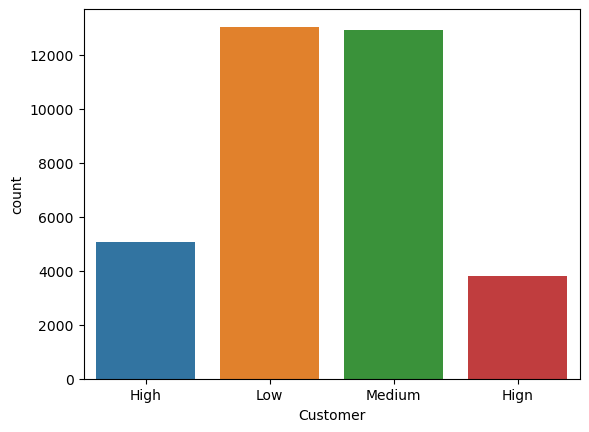

In [29]:
#Insights from Customers' column
sns.countplot(x="Customer", data=df, hue="Customer");

In [30]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       5082
Hign       3816
Name: count, dtype: int64

In [31]:
df[df["Customer"]=="Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_Group,cost,revenue,profit,P or L
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,26-40 Adult,2295.00,2136.00,-159.0,loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,26-40 Adult,35.00,39.00,4.0,profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,26-40 Adult,50.01,56.01,6.0,profit


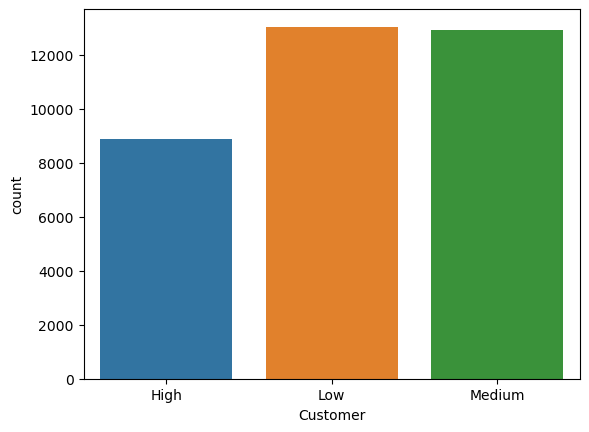

In [32]:
#CORRECTING THE "HIGN" SPELLING ERROR
df.loc[df["Customer"]=="Hign", "Customer"]= "High"
sns.countplot(x="Customer",hue="Customer", data=df);

In [33]:
 df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8898
Name: count, dtype: int64

In [34]:
#narration

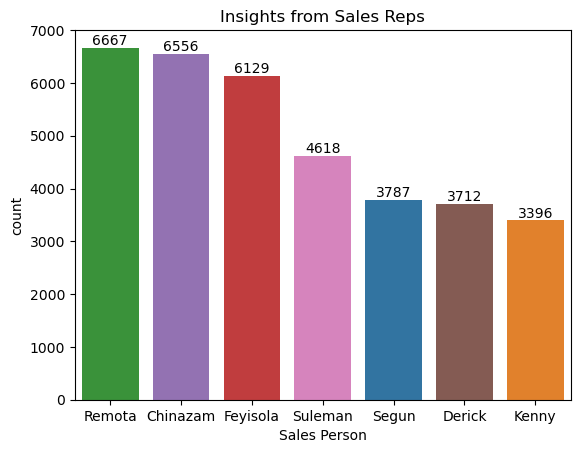

In [35]:
ax = sns.countplot(x=df["Sales Person"], hue=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Insights from Sales Reps")

plt.show()

In [36]:
####

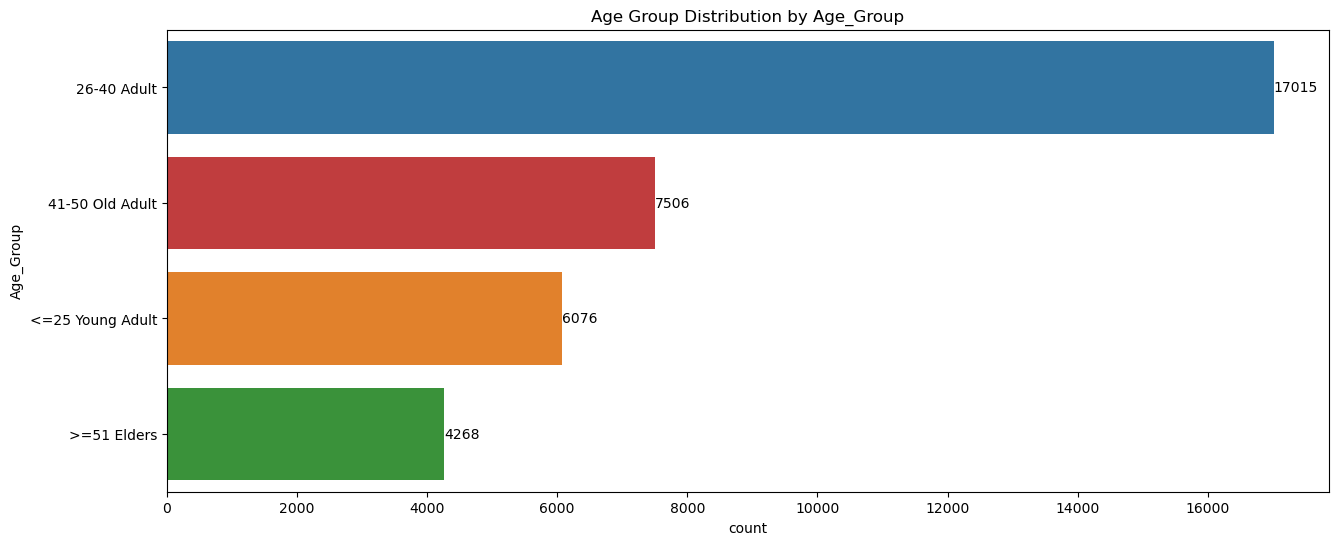

In [37]:

plt.figure(figsize=(15, 6))
ax = sns.countplot(y="Age_Group", hue="Age_Group", data=df, order=df["Age_Group"].value_counts(ascending=False).index)
values = df["Age_Group"].value_counts(ascending=False).values
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Age Group Distribution by Age_Group")

plt.show()

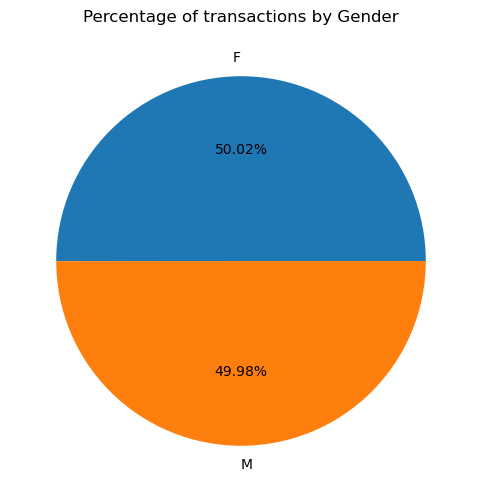

In [38]:
# Customer gender
fig,ax = plt.subplots(figsize=(6, 6))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f'{p:.2f}%')
ax.set_title ("Percentage of transactions by Gender")
plt.show();

In [39]:
3333

3333

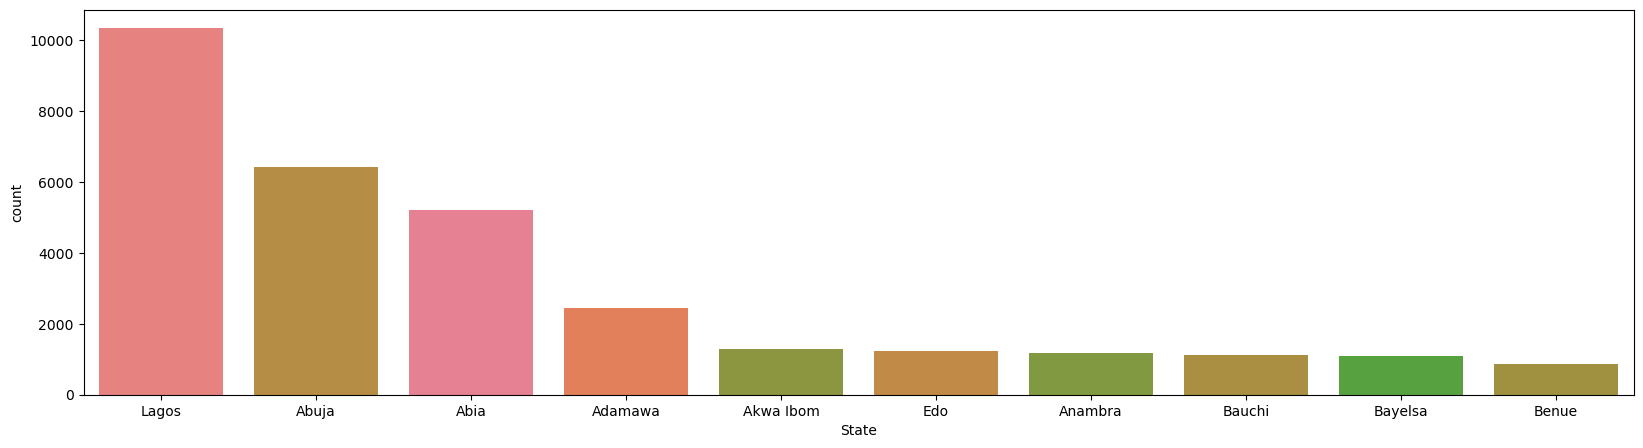

In [40]:
#states
plt.figure(figsize=(20,5))
top_10 = df["State"].value_counts().head(10)
sns.countplot(x="State",  hue="State", data=df, order=top_10.index);

In [41]:
####3

In [42]:
df["Product_Category"].value_counts()

Product_Category
Accessories    22533
Phones          7093
Clothing        5239
Name: count, dtype: int64

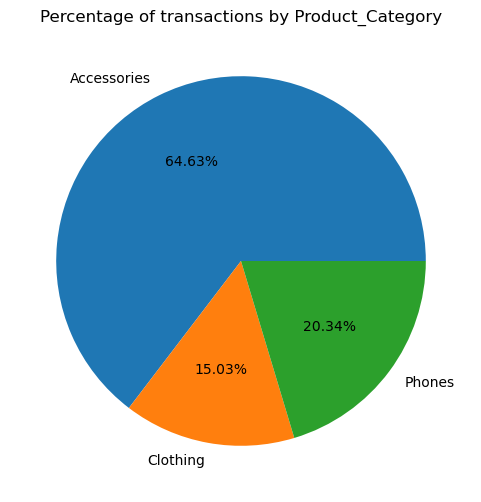

In [43]:
# product categories
fig,ax = plt.subplots(figsize=(6, 6))
count = Counter(df["Product_Category"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f'{p:.2f}%')
ax.set_title ("Percentage of transactions by Product_Category")
plt.show();

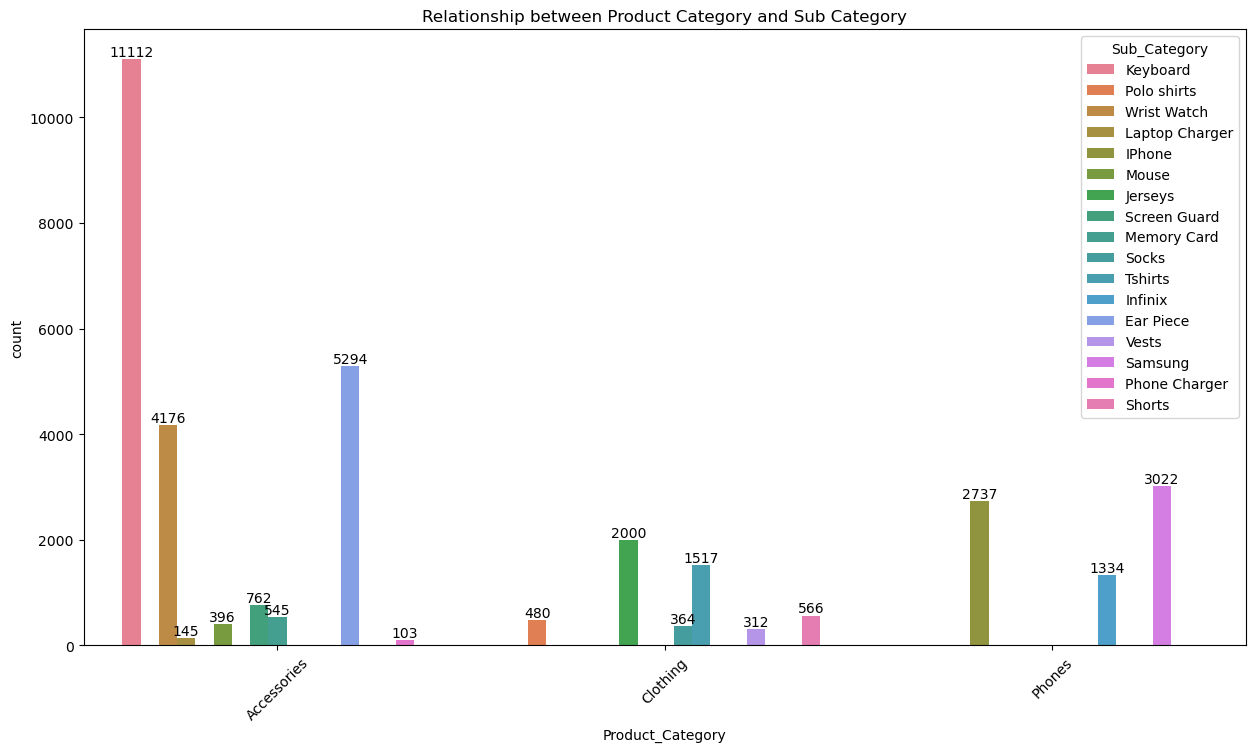

In [44]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x="Product_Category", hue="Sub_Category", data=df)
plt.xticks(rotation=45)
plt.title("Relationship between Product Category and Sub Category")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Show the plot
plt.show()

In [45]:
df["Sub_Category"].value_counts()

Sub_Category
Keyboard          11112
Ear Piece          5294
Wrist Watch        4176
Samsung            3022
IPhone             2737
Jerseys            2000
Tshirts            1517
Infinix            1334
Screen Guard        762
Shorts              566
Memory Card         545
Polo shirts         480
Mouse               396
Socks               364
Vests               312
Laptop Charger      145
Phone Charger       103
Name: count, dtype: int64

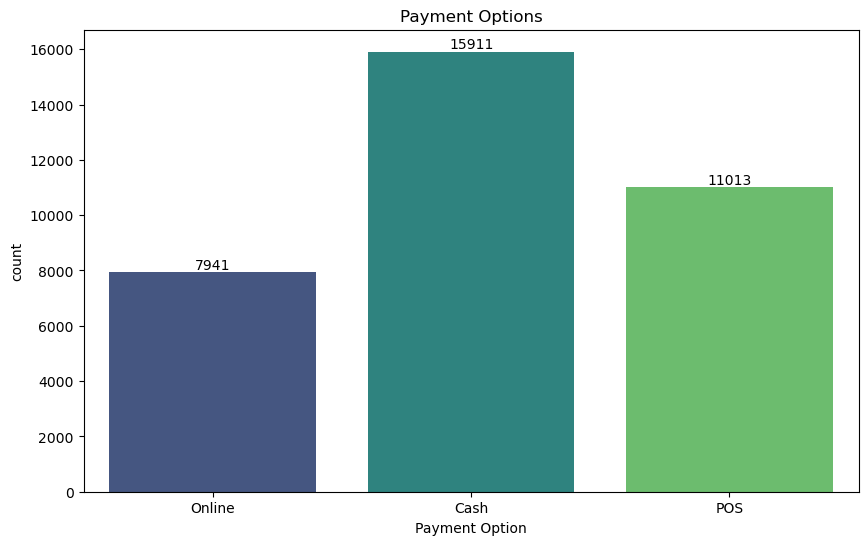

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Payment Option", hue="Payment Option", data=df, palette="viridis", legend=False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Payment Options")

plt.show()

In [47]:
df["Payment Option"].value_counts()

Payment Option
Cash      15911
POS       11013
Online     7941
Name: count, dtype: int64

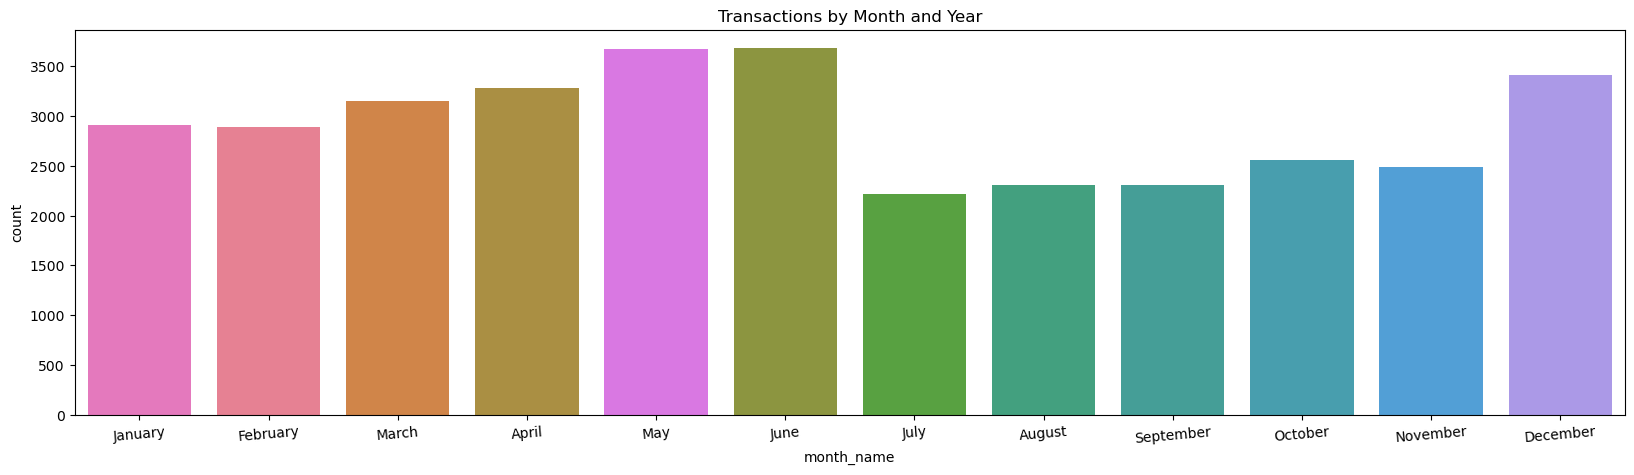

In [48]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="month_name", hue="month_name", data=df, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.xticks(rotation=5)

# Add title and labels
plt.title("Transactions by Month and Year")


# Show the plot
plt.show()


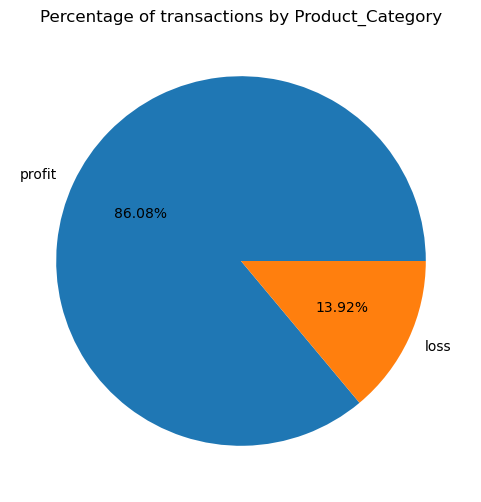

In [49]:
fig,ax = plt.subplots(figsize=(6, 6))
count = Counter(df["P or L"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f'{p:.2f}%')
ax.set_title ("Percentage of transactions by Product_Category")
plt.show();

## NUMERICAL COLUMNS

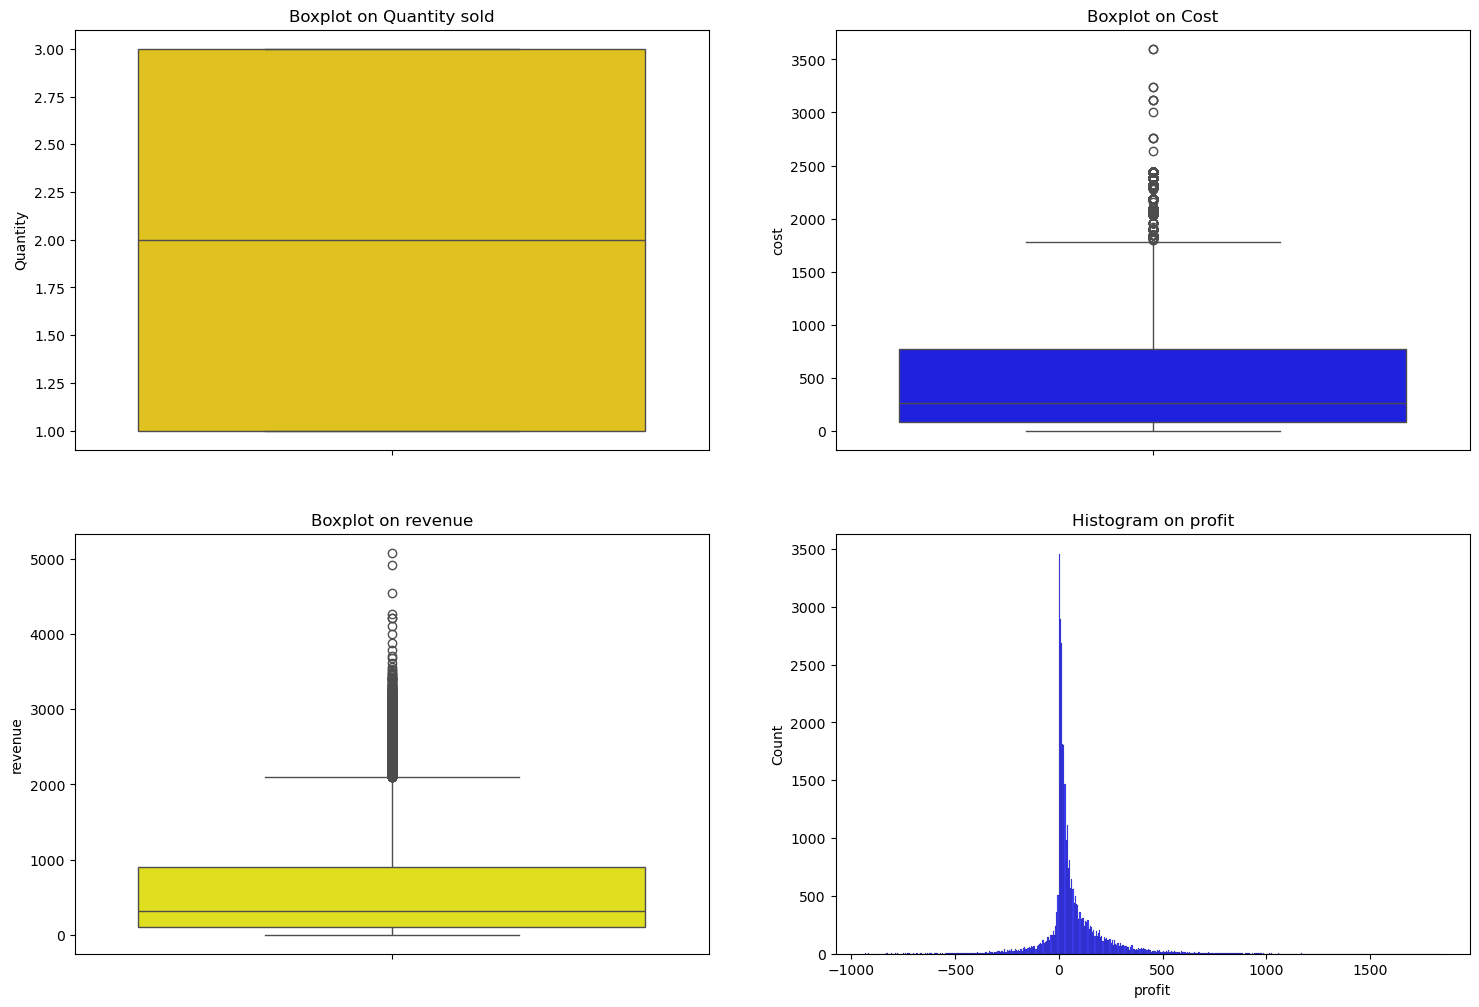

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.boxplot(df["Quantity"], color="gold", ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(df["cost"], color="blue", ax=axs[0,1])
axs[0,1].set_title("Boxplot on Cost")

sns.boxplot(df["revenue"], color="yellow", ax=axs[1,0])
axs[1,0].set_title("Boxplot on revenue")

sns.histplot(df["profit"], color="blue", ax=axs[1,1])
axs[1,1].set_title("Histogram on profit");

# BIVARIATE ANALYSIS

In [53]:
categoricall_columns

Index(['Customer', 'Sales Person', 'Customer_Gender', 'State',
       'Product_Category', 'Sub_Category', 'Payment Option', 'month_name',
       'Age_Group', 'P or L'],
      dtype='object')

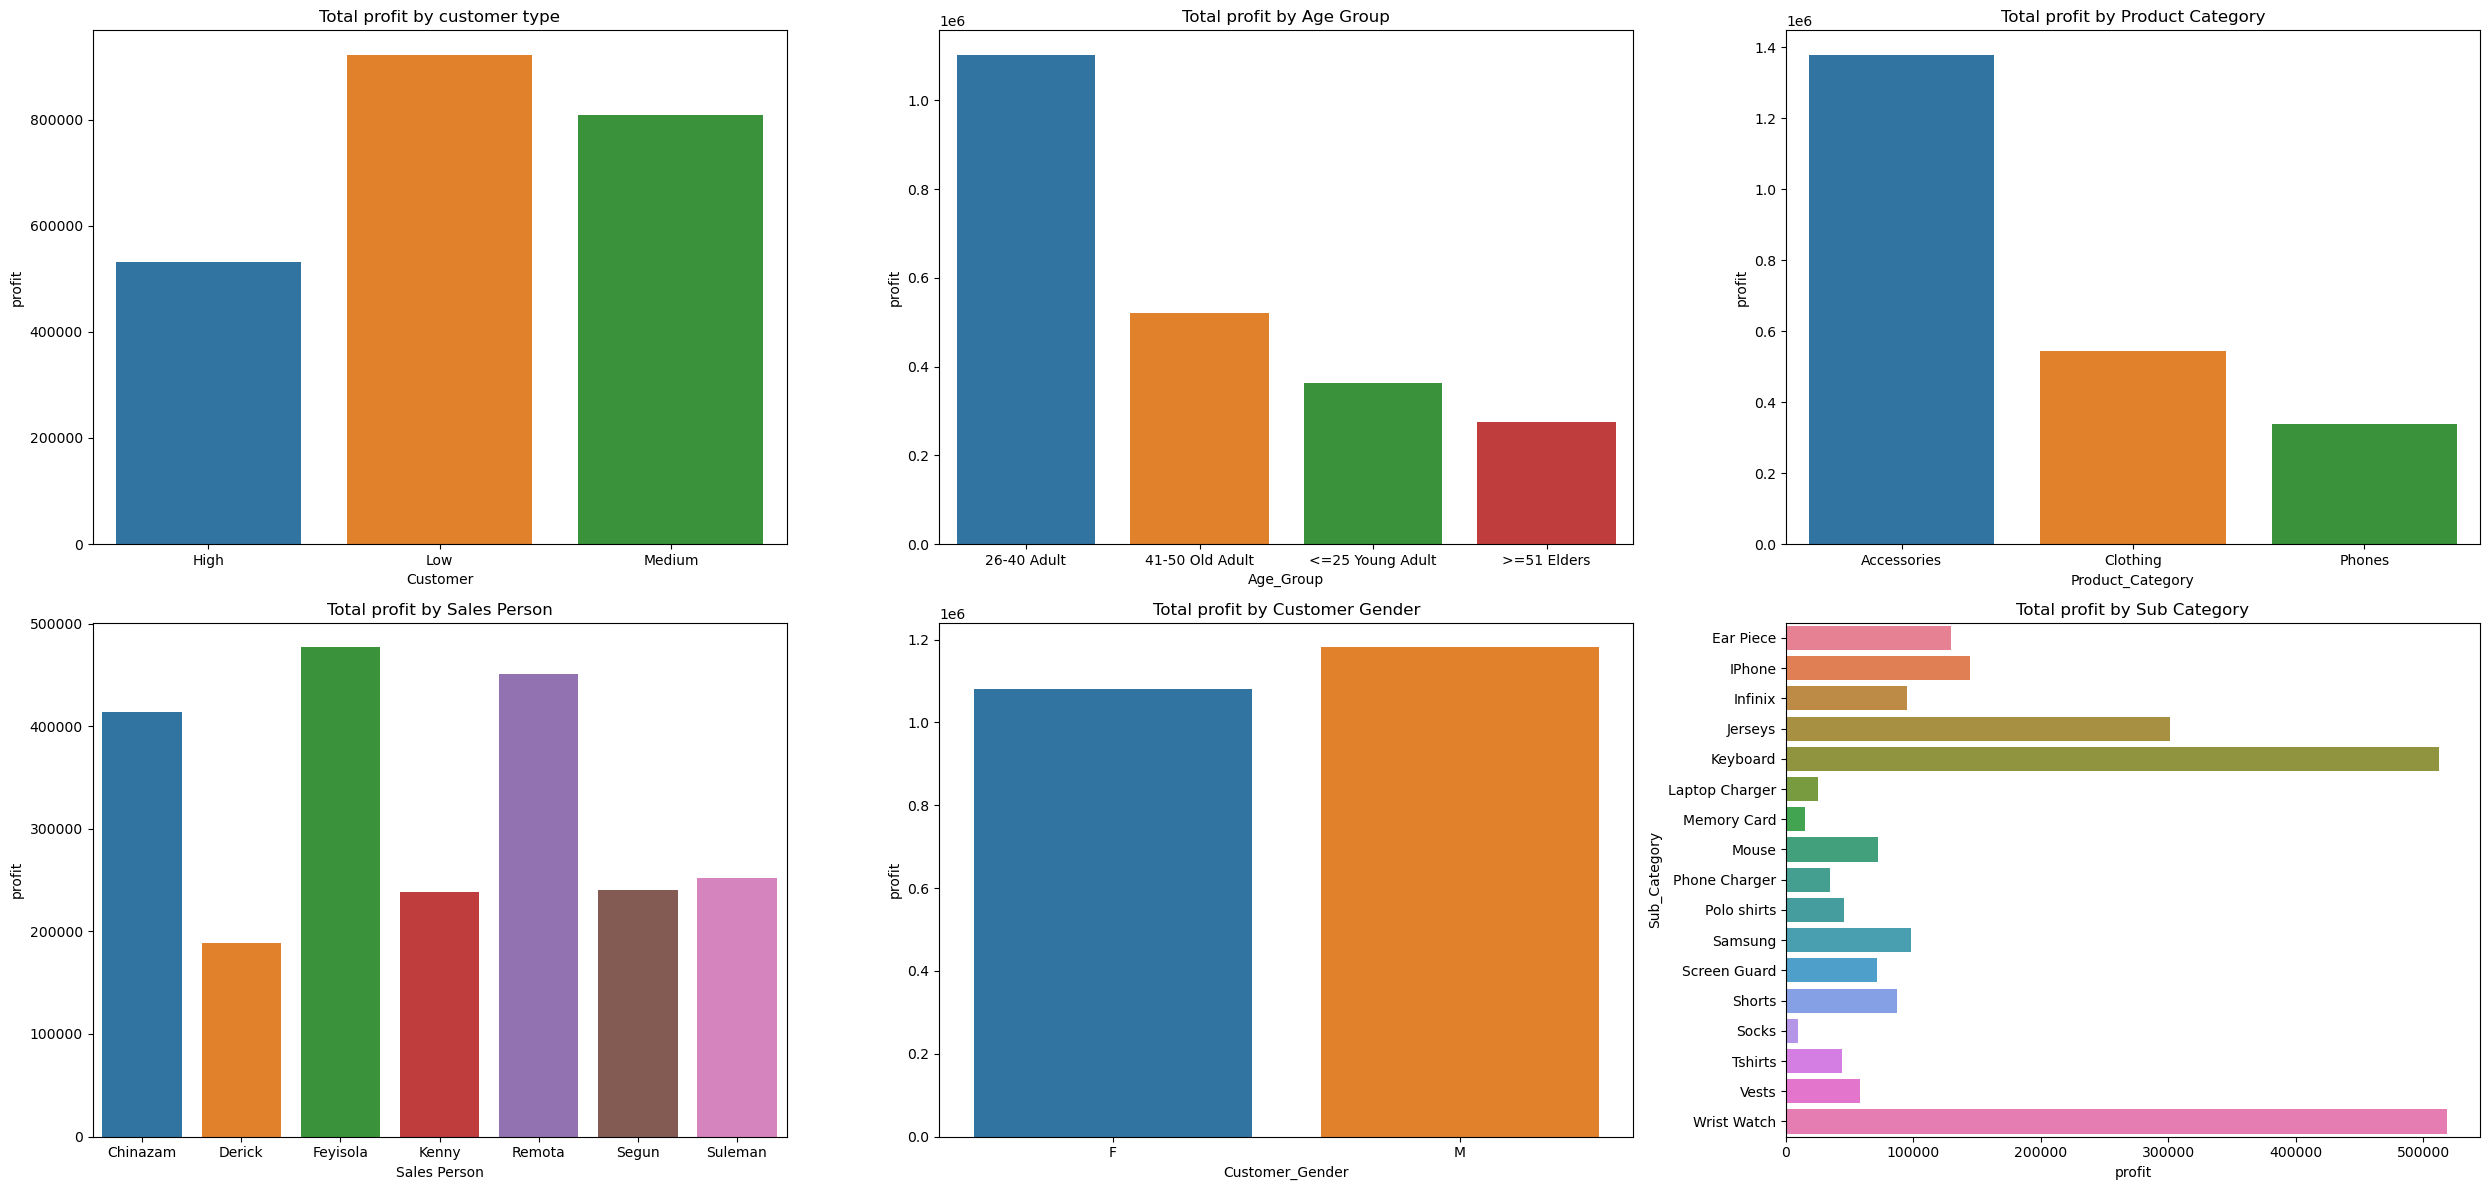

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,12))
cust_profit=df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x="Customer", hue="Customer",data=cust_profit, y="profit",ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type")

ag_profit=df.groupby("Age_Group")["profit"].sum().reset_index()
sns.barplot(x="Age_Group", hue="Age_Group",data=ag_profit, y="profit",ax=axs[0,1])
axs[0,1].set_title("Total profit by Age Group")

pc_profit=df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(x="Product_Category", hue="Product_Category",data=pc_profit, y="profit",ax=axs[0,2])
axs[0,2].set_title("Total profit by Product Category")

Sale_profit=df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x="Sales Person", hue="Sales Person",data=Sale_profit, y="profit",ax=axs[1,0])
axs[1,0].set_title("Total profit by Sales Person")

custg_profit=df.groupby("Customer_Gender")["profit"].sum().reset_index()
sns.barplot(x="Customer_Gender", hue="Customer_Gender",data=custg_profit, y="profit",ax=axs[1,1])
axs[1,1].set_title("Total profit by Customer Gender")

sub_profit=df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(x="profit", hue="Sub_Category",data=sub_profit, y="Sub_Category",ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub Category")

plt.tight_layout()
plt.show()

In [55]:
numerical_columns

Index(['Customer_Age', 'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month',
       'quarter', 'cost', 'revenue', 'profit'],
      dtype='object')

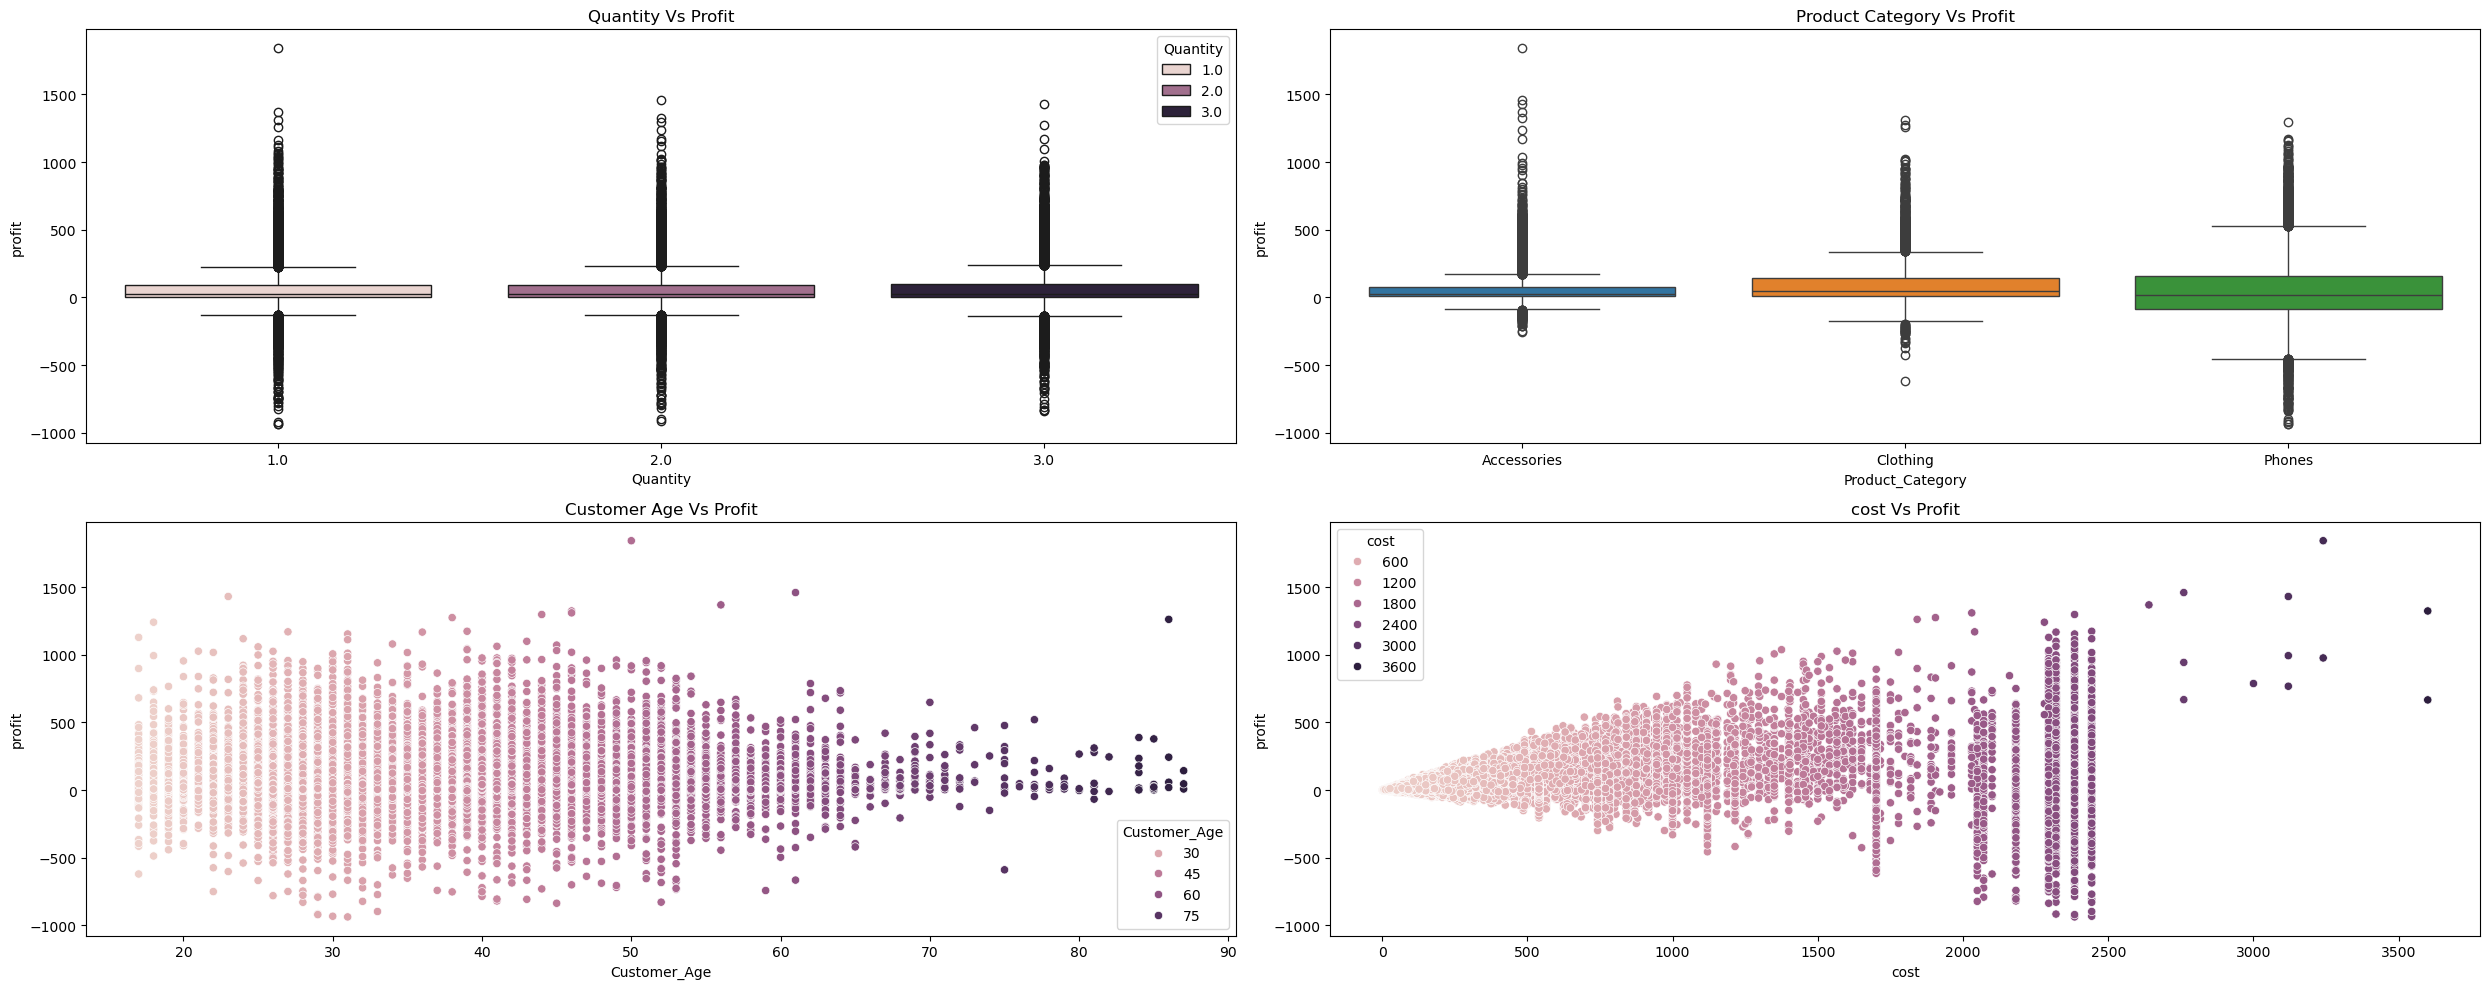

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.boxplot(x="Quantity", y="profit", hue="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity Vs Profit")

sns.boxplot(x="Product_Category", y="profit", hue="Product_Category", data=df, ax=axs[0,1])
axs[0,1].set_title("Product Category Vs Profit")

sns.scatterplot(x="Customer_Age", y="profit", hue="Customer_Age", data=df, ax=axs[1,0])
axs[1,0].set_title("Customer Age Vs Profit")

sns.scatterplot(x="cost", y="profit", hue="cost", data=df, ax=axs[1,1])
axs[1,1].set_title("cost Vs Profit")
plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS

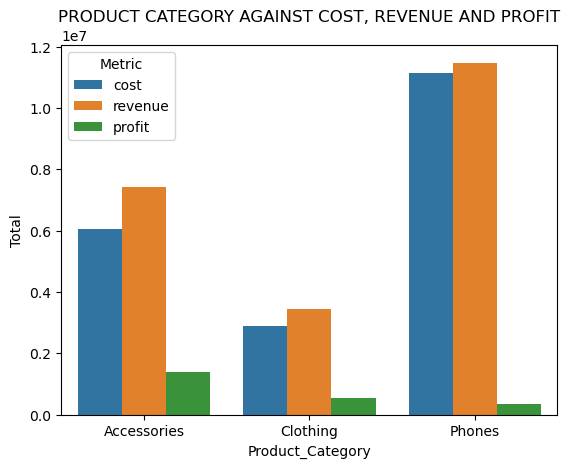

In [58]:
#PRODUCT CATEGORY AGAINST COST, REVENUE AND PROFIT
pcat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
pcat= pd.melt(pcat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=pcat, x="Product_Category", y="Total", hue='Metric');

plt.title("PRODUCT CATEGORY AGAINST COST, REVENUE AND PROFIT")
plt.show()

In [59]:
pcat

,Product_Category,Metric,Total
0,Accessories,cost,6041876.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420635.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378759.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


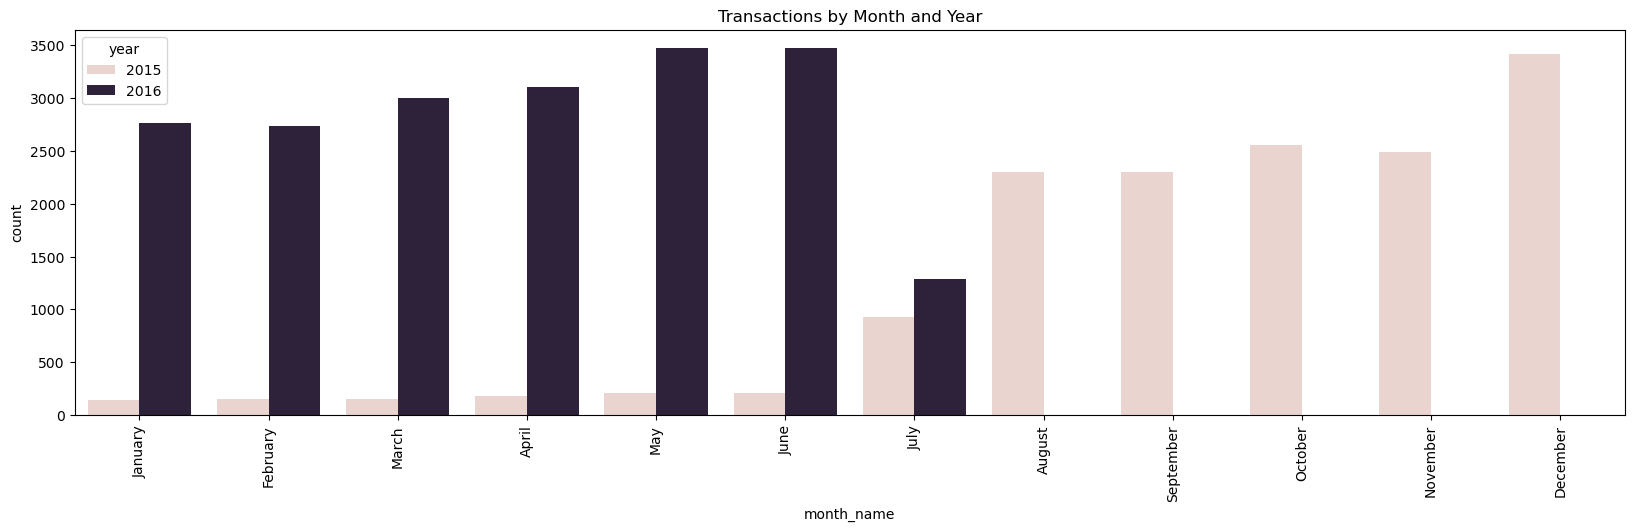

In [60]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="month_name", hue="year", data=df, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.xticks(rotation=90)
plt.title("Transactions by Month and Year")

plt.show()

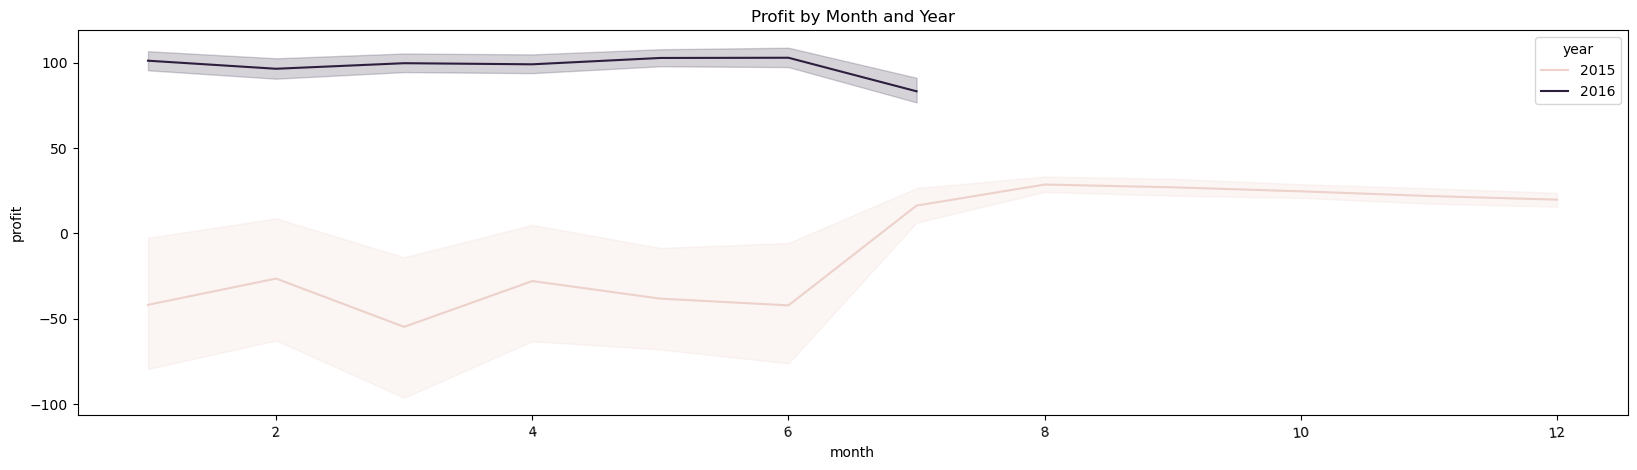

In [61]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x="month", y="profit", hue="year", data=df)
plt.xticks(rotation=5)
plt.title("Profit by Month and Year")

plt.show()

# PIVOT TABLE

In [63]:
df.pivot_table(values='profit', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65918.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Customer_Gender', ylabel='profit'>

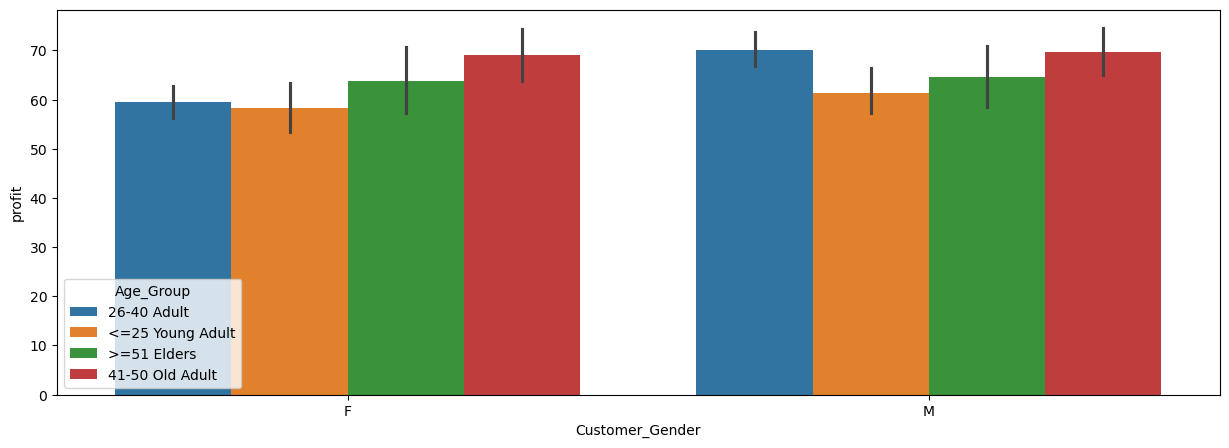

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y="profit", data=df, hue='Age_Group')

# CORRELATION

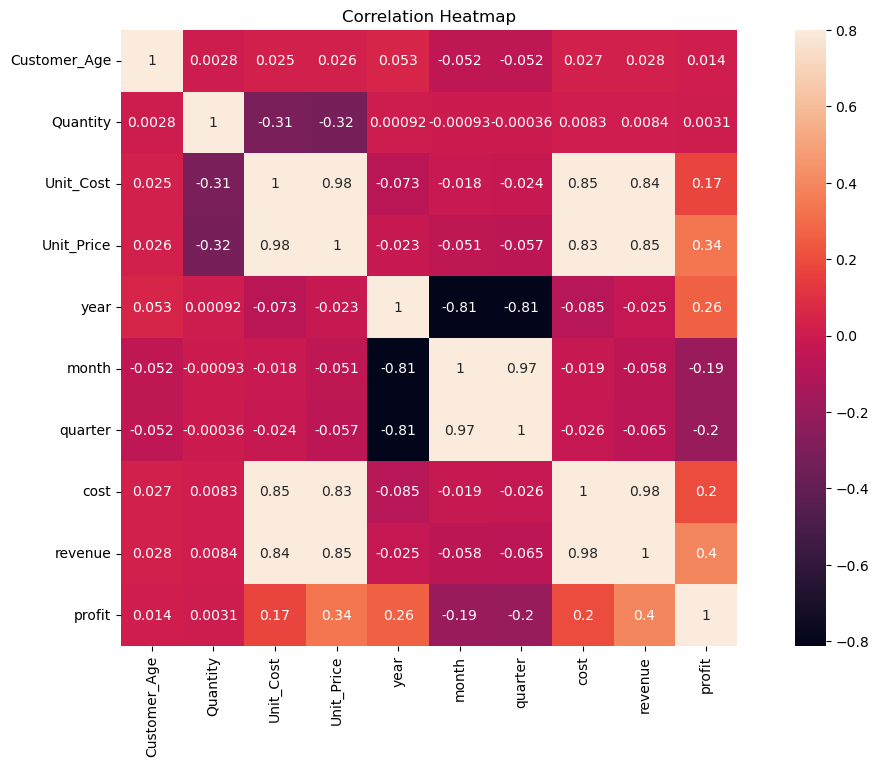

In [66]:
numeric_df = df.select_dtypes(include=[float, int])
a = numeric_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(a, vmax=0.8, square=True, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Pairplots 

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


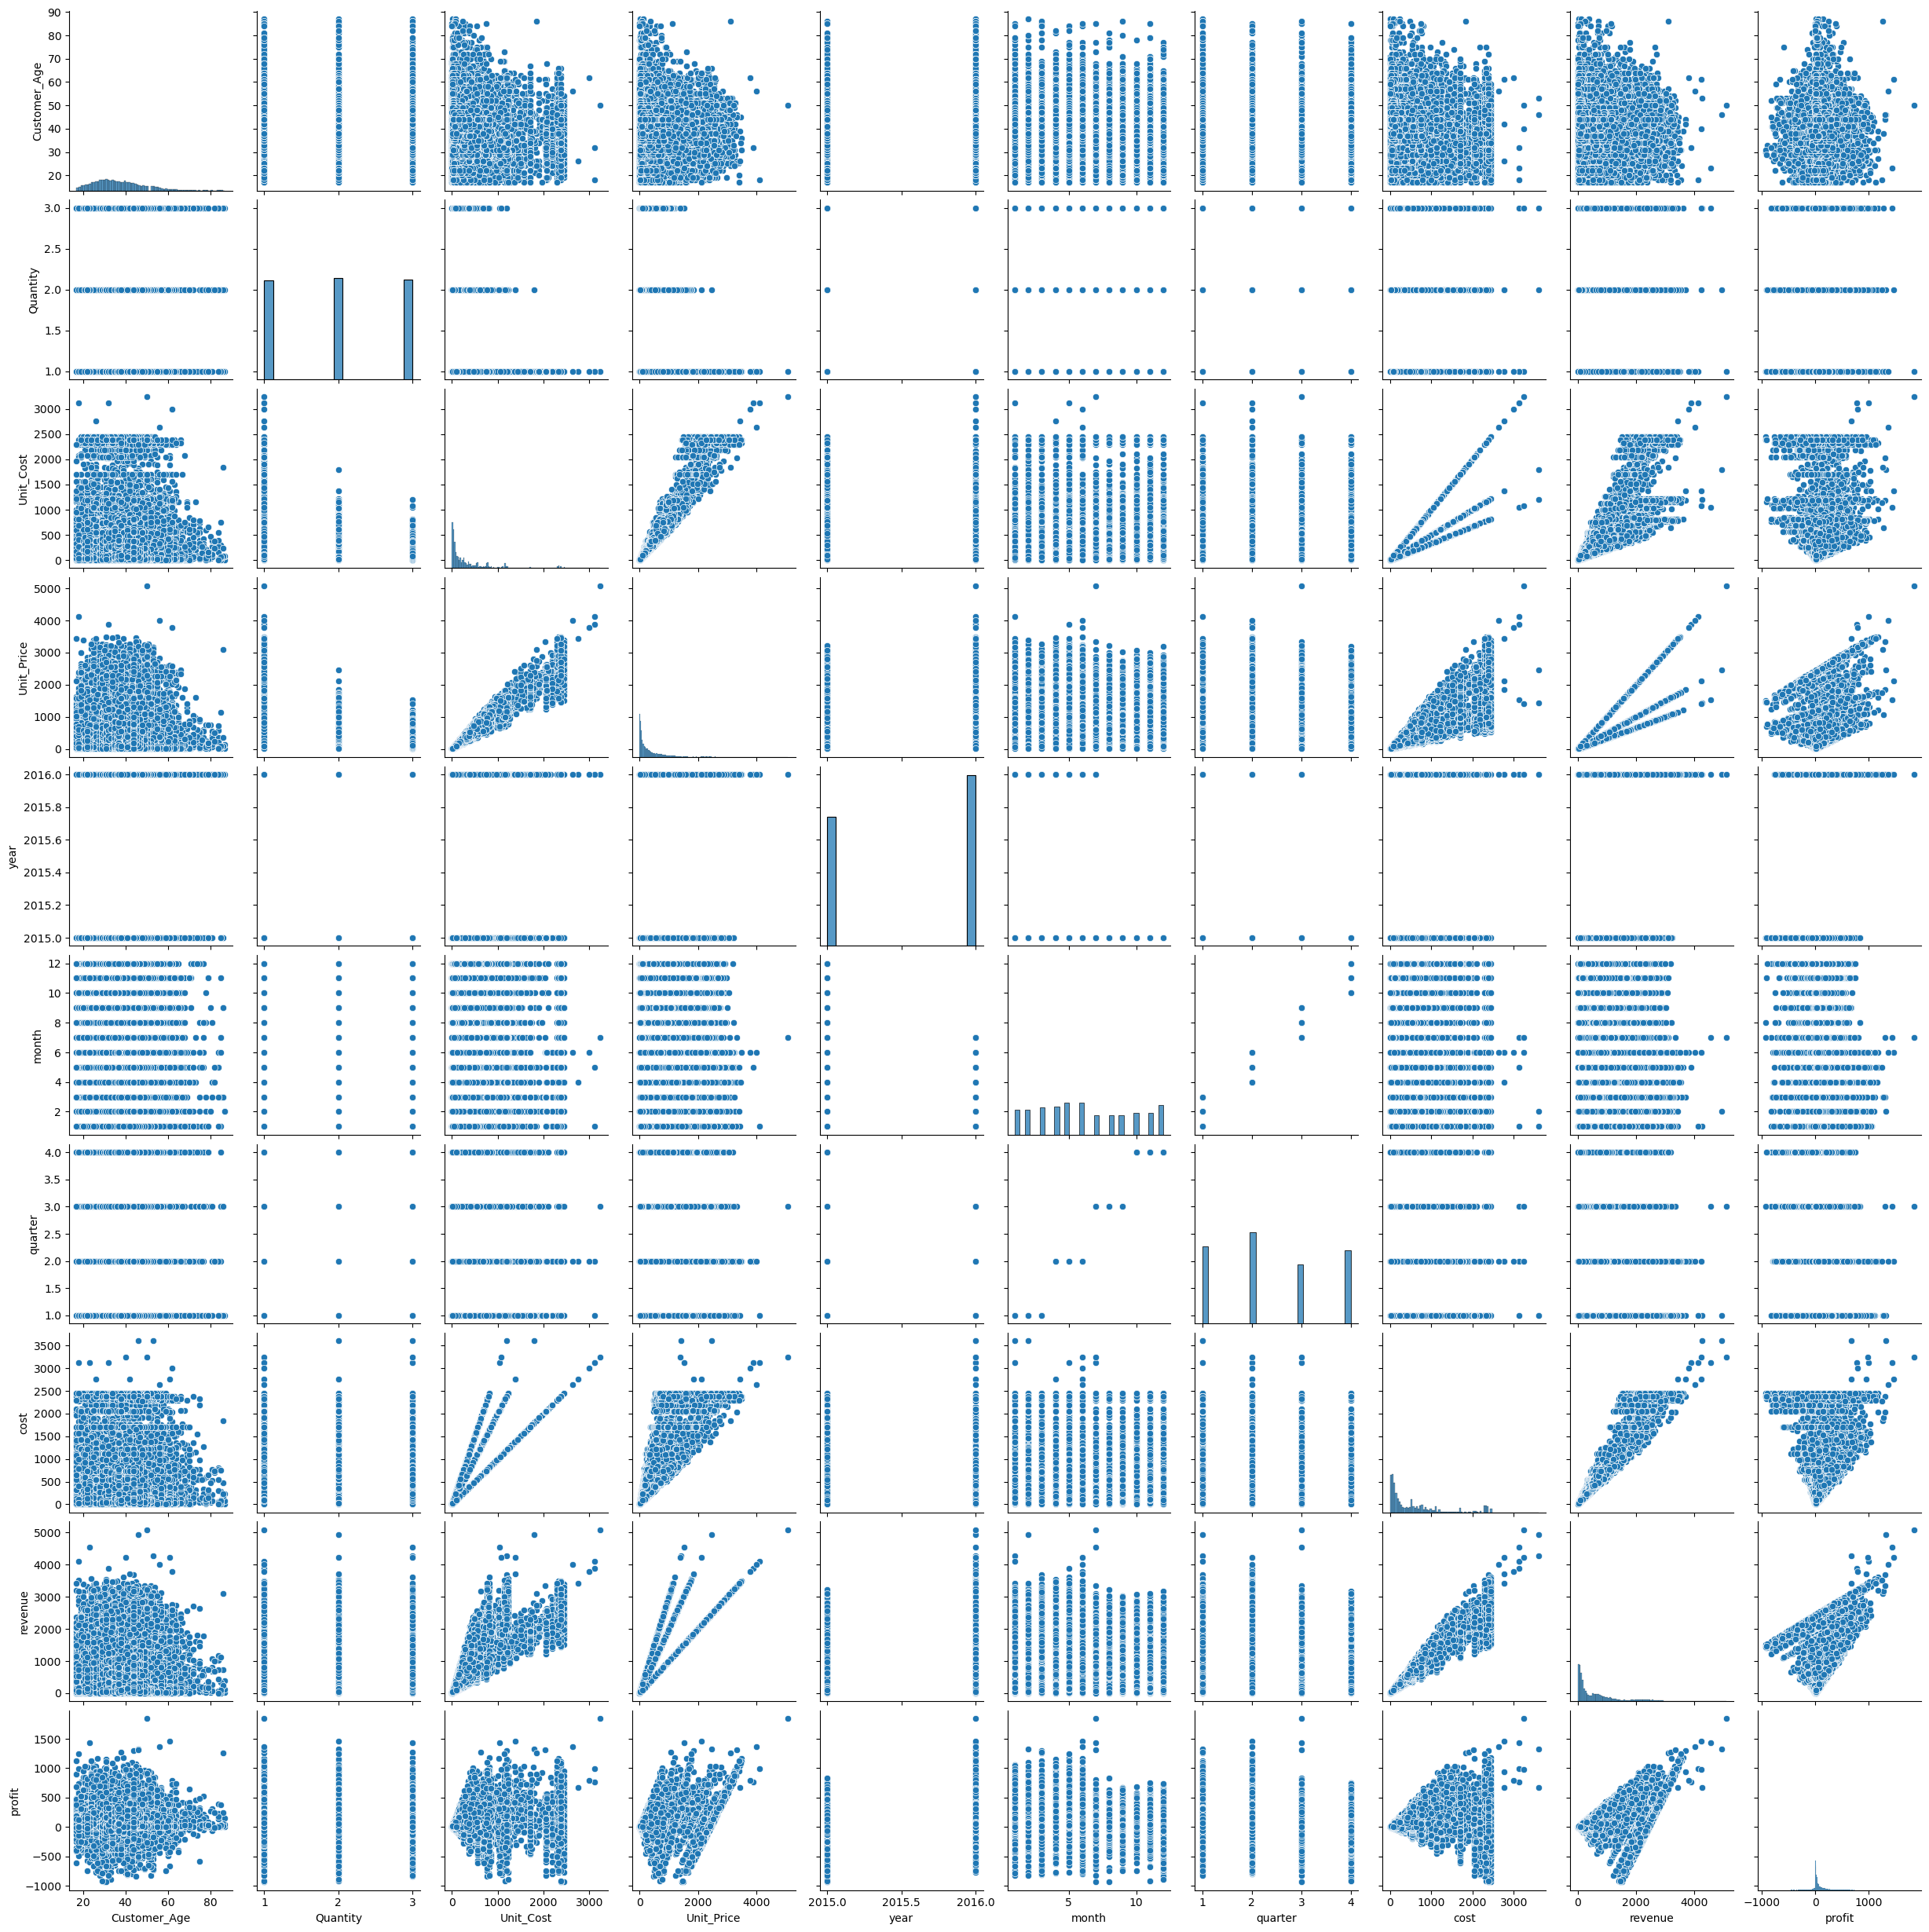

In [68]:
sns.pairplot(df, size=2.5);

# Exploratory Data Analysis (EDA) Observations
#### This document outlines the key observations from the Exploratory Data Analysis (EDA) performed on the sales dataset. The analysis covers various aspects such as customer demographics, sales performance, product distribution, and financial metrics.

### Customer Distribution
### Visualization: Countplot
#### Insights: Identified top customers and dominant groups.
##### Recommendations: Engage high-value customers with personalized offers. Re-engage low-frequency customers with targeted campaigns.


### Sales Person Performance
### Visualization: Countplot
#### Insights: Identified top performers and those needing support.
##### Recommendations: Reward top performers. Upskill others based on strategies used by top performers.


### Customer Age Group Distribution
### Visualization: Countplot
#### Insights: Highlighted primary demographic driving sales.
##### Recommendations: Tailor marketing to dominant age group. Explore strategies to attract underrepresented age groups.

### Missing Data and Data Cleaning
### Visualization: Heatmap, missingno bar chart
#### Insights: Ensured data accuracy and reliable insights.
##### Recommendations: Automate data validation. Track metrics post-cleaning for accuracy improvements.eaker areas with training and targeted campaigns.



### Customer Gender Distribution
### Visualization: Pie chart
#### Insights: Revealed gender-based preferences.
##### Recommendations: Create gender-specific campaigns. Develop products that appeal to the underrepresented gender.


### State-Wise Sales
### Visualization: Countplot
#### Insights: Identified high-performing and untapped regions.
##### Recommendations: Expand operations in top-performing states. Address challenges in underperforming regions.


### Product Category Distribution
### Visualization: Pie chart
#### Insights: Determined popular and underperforming categories.
##### Recommendations: Prioritize inventory for popular categories. Promote less popular categories.


### Payment Options
### Visualization: Countplot
#### Insights: Showed customer payment preferences.
##### Recommendations: Optimize popular payment methods. Promote incentives for less used methods.


### Monthly Transactions
### Visualization: Countplot
#### Insights: Identified seasonality and sales activity periods.
##### Recommendations: Prepare for peak months with increased inventory and marketing. Drive sales during slow months with targeted promotions.


### Profit vs. Loss
### Visualization: Pie chart
#### Insights: Assessed overall business profitability.
##### Recommendations: Investigate reasons for losses and adjust pricing or costs. Focus on high-margin products


### Financial Metrics Distribution
### Visualization: Boxplots, profit histogram
#### Insights: Highlighted variability and outliers in key metrics.
##### Recommendations: Control outliers to stabilize operations. Maximize profitability by focusing on consistent profits.


### Profit Analysis Across Dimensions
### Visualization: Bar plots
#### Insights: Identified profitable segments and areas for improvement.
##### Recommendations: Reinforce efforts in profitable segments. Support weaker areas with training and targeted campaigns